# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from pandas import DataFrame


# **Loading Dataset**

In [2]:
# Load dataset
#df = pd.read_csv('../input/ucidata/crx.data',header=None)
header_names=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
df = pd.read_csv('../input/ucidata/crx.data',names=header_names)

# Inspect data
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


##  **Knowing the data**

In [3]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       690 non-null    object 
 1   B       690 non-null    object 
 2   C       690 non-null    float64
 3   D       690 non-null    object 
 4   E       690 non-null    object 
 5   F       690 non-null    object 
 6   G       690 non-null    object 
 7   H       690 non-null    float64
 8   I       690 non-null    object 
 9   J       690 non-null    object 
 10  K       690 non-null    int64  
 11  L       690 non-null    object 
 12  M       690 non-null    object 
 13  N       690 non-null    object 
 14  O       690 non-null    int64  
 15  P       690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [4]:
# summary statistics
df.describe()

,C,H,K,O
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


## **Inspect missing values in the dataset**


In [5]:
df.head(50)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [6]:
df.tail(50)

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
640,b,34.17,2.750,u,g,i,bb,2.500,f,f,0,t,g,00232,200,-
641,?,33.17,2.250,y,p,cc,v,3.500,f,f,0,t,g,00200,141,-
642,b,31.58,0.750,y,p,aa,v,3.500,f,f,0,t,g,00320,0,-
643,a,52.50,7.000,u,g,aa,h,3.000,f,f,0,f,g,00000,0,-
644,b,36.17,0.420,y,p,w,v,0.290,f,f,0,t,g,00309,2,-
645,b,37.33,2.665,u,g,cc,v,0.165,f,f,0,t,g,00000,501,-
646,a,20.83,8.500,u,g,c,v,0.165,f,f,0,f,g,00000,351,-
647,b,24.08,9.000,u,g,aa,v,0.250,f,f,0,t,g,00000,0,-
648,b,25.58,0.335,u,g,k,h,3.500,f,f,0,t,g,00340,0,-
649,a,35.17,3.750,u,g,ff,ff,0.000,f,t,6,f,g,00000,200,-


In [7]:
# for each of the categorical columns, lets see the unique values
for i in df.columns:
    #print(i)
    if df[i].dtype==object:
        print(df[i].unique())

['b' 'a' '?']
['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' '18.83' '26.92' '31.25' '56.50' 

We can see the null values are represented by $?$ in the dataset.
* Let's first replace $?$ with NaN


In [8]:
df = df.replace('?',np.nan)

In [9]:
## Lets modify the functions to make them more readable 

def missing_values(df):
    ''' This function takes a data frame as input 
    prints the fraction of entries with missing values (NaN)
    prints the list of columns with corresponding number of missing values
    '''
    # Total number of entries (rows X columns) in the dataset
    total= df.size
    #Number of missing values per column
    missingCount = df.isnull().sum()
    #Total number of missing values
    missing_tot = missingCount.sum()
    # Calculate percentage of missing values
    #print('general info of dataframe \n\n\n\n',df.info())
    print(f'Total number of missing values for each column of dataframe: \n \b \b \b',missingCount)
    print("The dataset contains", round(((missing_tot/total) * 100), 2), "%", "missing values.\n\n\n")
    
    
def column_missingdata(df):
    ''' This function takes a data frame as input 
    prints the list of columns with corresponding % of missing values
    '''
    #check for missing values per column
    values=df.isnull().sum()#.sort_values(ascending=False)
    total= df.size
    #percentage of missing values per column
    percentage=(values/total) * 100
    print(f'% of missing values for each column of dataframe: \n \b \b \b',percentage,'\n\n\n')

def plot_missingdata(df:pd.DataFrame, title:str, xlabel:str, ylabel:str):
    ''' This function takes a data frame as input 
    plots the list of columns with corresponding total number of missing values
    '''
    # Let us see what columns have missing values
    # total number of missing values for each dataframe column
    missing = df.isnull().sum() 
    # keeping only the columns with missing values>0 
    missing = missing[missing > 0] 
    # sorting in order of missing values and making the change to original missing series
    missing.sort_values(inplace=True) 
    missing.plot.bar(color='blue')
    plt.title(title, size=15)
    plt.xticks(fontsize=11,rotation=45)
    plt.yticks(fontsize=11)
    plt.xlabel(xlabel, fontsize=13)
    plt.ylabel(ylabel, fontsize=13)
    plt.show()

Total number of missing values for each column of dataframe: 
    A    12
B    12
C     0
D     6
E     6
F     9
G     9
H     0
I     0
J     0
K     0
L     0
M     0
N    13
O     0
P     0
dtype: int64
The dataset contains 0.61 % missing values.



% of missing values for each column of dataframe: 
    A    0.108696
B    0.108696
C    0.000000
D    0.054348
E    0.054348
F    0.081522
G    0.081522
H    0.000000
I    0.000000
J    0.000000
K    0.000000
L    0.000000
M    0.000000
N    0.117754
O    0.000000
P    0.000000
dtype: float64 





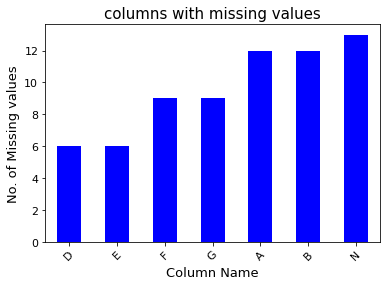

In [10]:
missing_values(df)
column_missingdata(df)
plot_missingdata(df,'columns with missing values','Column Name','No. of Missing values')

In [11]:
def fix_missing_mean(df,col):
    ''' This function takes a data frame as input 
    replaces the missing values of a particular column with it's mean value
    '''
    #replace missing values with mean 
    df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col].fillna(df[col].mean(), inplace = True)    

def fix_missing_mode(df,col):
    ''' This function takes a data frame as input 
    replaces the missing values of a particular column with it's mean value
    '''
    #replace missing values with mode 
    #df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col].fillna(df[col].mode(), inplace = True)    

    
def fix_missing_ffill(df, col):
    ''' This function takes a data frame as input 
    replaces the missing values of a particular column with the value from the previous row
    '''
    #df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col] = df[col].fillna(method='ffill')  
    
def fix_missing_bfill(df, col):
    ''' This function takes a data frame as input 
    replaces the missing values of a particular column with the value from the next row
    '''
    #df[col] = pd.to_numeric(df[col], errors = 'coerce')
    df[col] = df[col].fillna(method='bfill')     

In [12]:
fix_missing_ffill(df,'A')
fix_missing_ffill(df,'B')
fix_missing_ffill(df,'D')
fix_missing_ffill(df,'E')
fix_missing_ffill(df,'F')
fix_missing_ffill(df,'G')
fix_missing_mean(df,'N')
missing_values(df)

Total number of missing values for each column of dataframe: 
    A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
L    0
M    0
N    0
O    0
P    0
dtype: int64
The dataset contains 0.0 % missing values.





In [13]:
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [14]:
# Separate target from features
y = df['P']
features = df.drop(['P'], axis=1)
# Preview features
features.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0


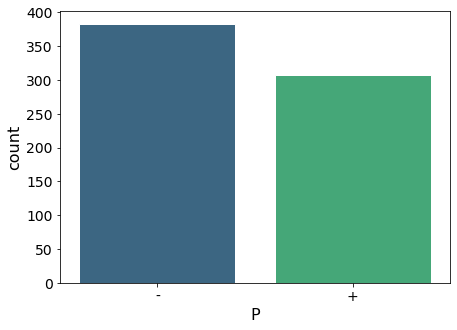

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(7,5), sharex=True)
sns.countplot(data=df, x='P',edgecolor="white",palette="viridis",order=df["P"].value_counts().index)
total = df['P'].value_counts().sum()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('P', fontsize=16)
plt.ylabel('count', fontsize=16)

plt.show()

In [16]:
# List of categorical columns
object_cols = ['A','B','D','E','F','G','I','J','L','M','N']

# ordinal-encode categorical columns
X = features.copy()
ordinal_encoder = OrdinalEncoder()
X[object_cols] = ordinal_encoder.fit_transform(features[object_cols])

# Preview the ordinal-encoded features
X.head()


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,1.0,156.0,0.000,1.0,0.0,12.0,7.0,1.25,1.0,1.0,1,0.0,0.0,69.0,0
1,0.0,328.0,4.460,1.0,0.0,10.0,3.0,3.04,1.0,1.0,6,0.0,0.0,11.0,560
2,0.0,89.0,0.500,1.0,0.0,10.0,3.0,1.50,1.0,0.0,0,0.0,0.0,97.0,824
3,1.0,125.0,1.540,1.0,0.0,12.0,7.0,3.75,1.0,1.0,5,1.0,0.0,31.0,3
4,1.0,43.0,5.625,1.0,0.0,12.0,7.0,1.71,1.0,0.0,0,0.0,2.0,37.0,0


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       690 non-null    float64
 1   B       690 non-null    float64
 2   C       690 non-null    float64
 3   D       690 non-null    float64
 4   E       690 non-null    float64
 5   F       690 non-null    float64
 6   G       690 non-null    float64
 7   H       690 non-null    float64
 8   I       690 non-null    float64
 9   J       690 non-null    float64
 10  K       690 non-null    int64  
 11  L       690 non-null    float64
 12  M       690 non-null    float64
 13  N       690 non-null    float64
 14  O       690 non-null    int64  
dtypes: float64(13), int64(2)
memory usage: 81.0 KB


<AxesSubplot:>

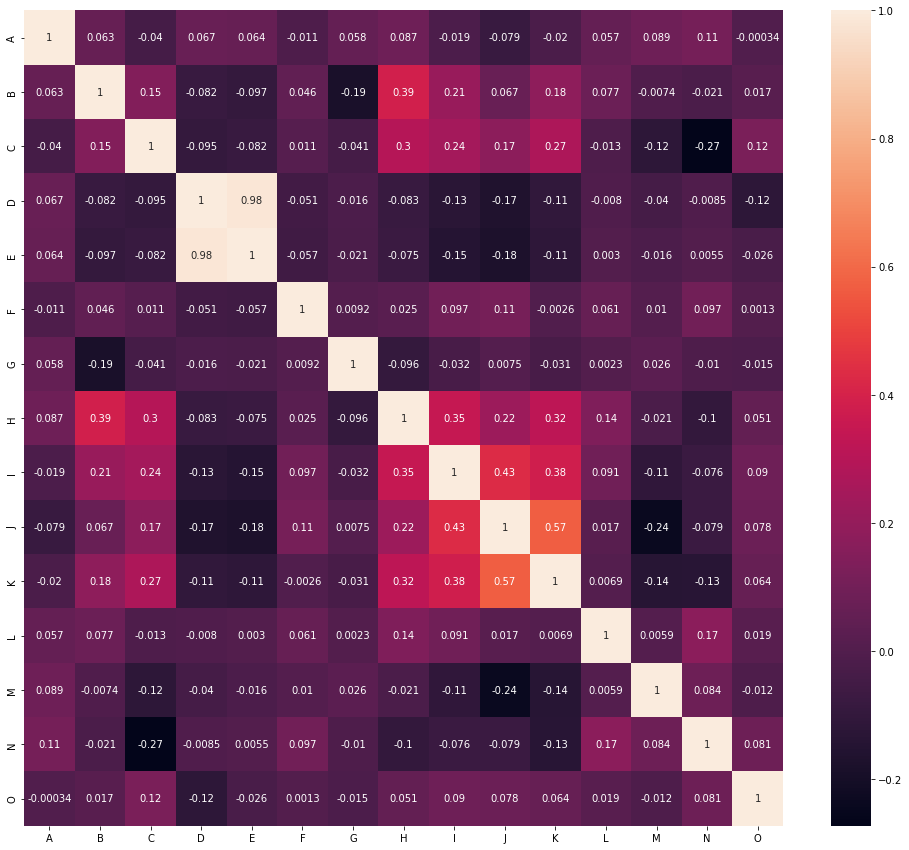

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(17,15))
sns.heatmap(X.corr(), annot = True)

In [19]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y,test_size=0.30,random_state=2)

## **Classifiers**

#### **Decision Tree**

1 Train score: 0.8426501035196687 Test score: 0.8840579710144928
2 Train score: 0.8426501035196687 Test score: 0.8840579710144928
3 Train score: 0.8509316770186336 Test score: 0.855072463768116
4 Train score: 0.8737060041407867 Test score: 0.8357487922705314
5 Train score: 0.8881987577639752 Test score: 0.8405797101449275
6 Train score: 0.9254658385093167 Test score: 0.8115942028985508
7 Train score: 0.94824016563147 Test score: 0.821256038647343
8 Train score: 0.9668737060041408 Test score: 0.8115942028985508
9 Train score: 0.9813664596273292 Test score: 0.8309178743961353


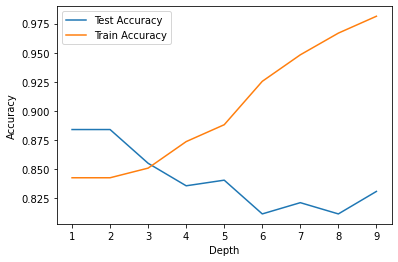

In [20]:
train_acc=[]
test_acc=[]
list_score=[]
p=[]

for i in range(1, 10):
    
    dtc = DecisionTreeClassifier(max_depth = i ,random_state = 0)
    dtc.fit(xTrain, yTrain)

    train_pred = dtc.predict(xTrain)
    #train_acc.append(score(train_pred, yTrain))
    
    test_pred = dtc.predict(xTest)
    #test_acc.append(score(test_pred, yTest))
    test_acc = accuracy_score(yTest, test_pred)
    train_acc = accuracy_score(yTrain, train_pred)
    print(i,'Train score:',train_acc,'Test score:',test_acc)

    list_score.append([i,accuracy_score(train_pred, yTrain),accuracy_score(test_pred, yTest)]) 
    
    
df2 = DataFrame (list_score,columns=['Depth','Train Accuracy','Test Accuracy'])
plt.plot(df2['Depth'],df2['Test Accuracy'],label='Test Accuracy')
plt.plot(df2['Depth'],df2['Train Accuracy'],label='Train Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()    

#### **Gradient Boost**

Train score: 0.9813664596273292 Test score: 0.8695652173913043


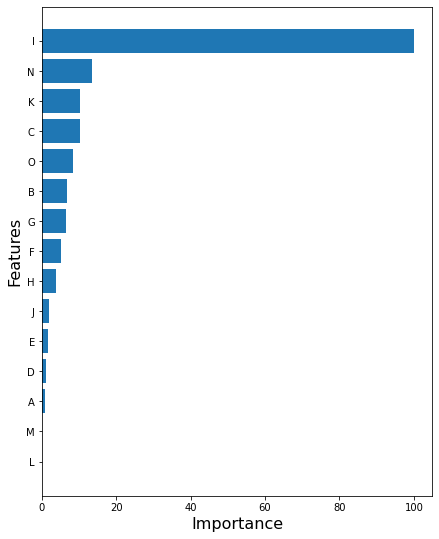

In [21]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(xTrain, yTrain)

train_predict = clf.predict(xTrain)
test_predict = clf.predict(xTest)


test_acc = accuracy_score(yTest, test_predict)
train_acc = accuracy_score(yTrain, train_predict)
print('Train score:',train_acc,'Test score:',test_acc)



# Plot feature importance 
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(7, 9))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.keys()[sorted_idx])
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Features',fontsize=16)
plt.show()

#### **XGBoost**

In [22]:
# fit model to training data
model = XGBClassifier()
model.fit(xTrain, yTrain)

train_predict = model.predict(xTrain)
test_predict = model.predict(xTest)

test_acc = accuracy_score(yTest, test_predict)
train_acc = accuracy_score(yTrain, train_predict)
print('Train score:',train_acc,'Test score:',test_acc)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:06:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score: 1.0 Test score: 0.8743961352657005


#### **KNN**

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(xTrain,yTrain)

train_predict = knn.predict(xTrain)
test_predict = knn.predict(xTest)

test_acc = accuracy_score(yTest, test_predict)
train_acc = accuracy_score(yTrain, train_predict)
print('Train score:',train_acc,'Test score:',test_acc)

Train score: 0.7743271221532091 Test score: 0.6908212560386473


Train score: 0.8115942028985508 Test score: 0.6714975845410628
2 Train score: 0.8115942028985508 Test score: 0.6714975845410628
Train score: 0.7929606625258799 Test score: 0.6811594202898551
3 Train score: 0.7929606625258799 Test score: 0.6811594202898551
Train score: 0.7619047619047619 Test score: 0.6521739130434783
4 Train score: 0.7619047619047619 Test score: 0.6521739130434783
Train score: 0.7743271221532091 Test score: 0.6908212560386473
5 Train score: 0.7743271221532091 Test score: 0.6908212560386473
Train score: 0.7660455486542443 Test score: 0.6763285024154589
6 Train score: 0.7660455486542443 Test score: 0.6763285024154589
Train score: 0.7370600414078675 Test score: 0.6956521739130435
7 Train score: 0.7370600414078675 Test score: 0.6956521739130435
Train score: 0.7391304347826086 Test score: 0.7101449275362319
8 Train score: 0.7391304347826086 Test score: 0.7101449275362319
Train score: 0.7308488612836439 Test score: 0.7101449275362319
9 Train score: 0.7308488612836439 Test sc

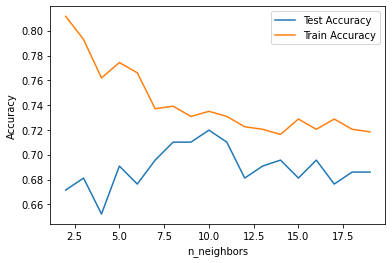

In [24]:
from sklearn.neighbors import KNeighborsClassifier

train_acc=[]
test_acc=[]
list_score=[]

for i in range(2, 20):
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(xTrain,yTrain)

    train_predict = knn.predict(xTrain)
    test_predict = knn.predict(xTest)

    test_acc = accuracy_score(yTest, test_predict)
    train_acc = accuracy_score(yTrain, train_predict)
    print('Train score:',train_acc,'Test score:',test_acc)
    print(i,'Train score:',train_acc,'Test score:',test_acc)

    list_score.append([i,accuracy_score(train_predict, yTrain),accuracy_score(test_predict, yTest)]) 
    
    
df3 = DataFrame (list_score,columns=['n_neighbors','Train Accuracy','Test Accuracy'])
plt.plot(df3['n_neighbors'],df3['Test Accuracy'],label='Test Accuracy')
plt.plot(df3['n_neighbors'],df3['Train Accuracy'],label='Train Accuracy')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend()    

#### **Logistic Regression**

In [25]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledxTrain = scaler.fit_transform(xTrain)
rescaledxTest = scaler.fit_transform(xTest)


In [26]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledxTrain, yTrain)

LogisticRegression()

In [27]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledxTest)
y_pred1 = logreg.predict(rescaledxTrain)

# Get the accuracy score of logreg model and print it
print("Test: Accuracy = ", logreg.score(rescaledxTest,yTest))
print("Train: Accuracy = ", logreg.score(rescaledxTrain,yTrain))

# Print the confusion matrix of the logreg model
confusion_matrix(yTest,y_pred)

Test: Accuracy =  0.8792270531400966
Train: Accuracy =  0.855072463768116


array([[91, 11],
       [14, 91]])


| Model | Train Accuracy | Test Accuracy |
| --- | --- | --- |
| **Logistic Regression** | 0.86 | 0.88|
| **Decision Tree** | 0.85 | 0.86 |
| **Gradiant Boost** | 0.98 | 0.87|
| **XGBoost** | 1.0 | 0.87|
| **KNN** | 0.73 | 0.72|

